In [40]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [41]:
mergeTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Merge/random/*.cali'))
radixTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Radix/random/*.cali'))
quickTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Quicksort/random/*.cali'))
bitonicTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Bitonic/random/*.cali'))

mergeTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Merge/random/*.cali'))
radixTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Radix/random/*.cali'))
# quickTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Quicksort/random/*.cali'))
bitonicTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Bitonic/random/*.cali'))

Clean up the merge data

In [42]:
MPIData = [mergeTKMPIRandom, radixTKMPIRandom, quickTKMPIRandom, bitonicTKMPIRandom]
MPIDataClean = []

for i in range(len(MPIData)):
    GB = MPIData[i].groupby("InputSize")

    Ctk = th.Thicket.concat_thickets(
        thickets=list(GB.values()),
        headers=list(GB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    Ctk.dataframe = Ctk.dataframe.reset_index().drop(remove_list, axis=1)
    MPIDataClean.append(Ctk)

CUDAData = [mergeTKCUDARandom, radixTKCUDARandom, bitonicTKCUDARandom]
CUDADataClean = []

for i in range(len(CUDAData)):
    GB = CUDAData[i].groupby("InputSize")

    Ctk = th.Thicket.concat_thickets(
        thickets=list(GB.values()),
        headers=list(GB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    Ctk.dataframe = Ctk.dataframe.reset_index().drop(remove_list, axis=1)
    CUDADataClean.append(Ctk)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x1699bf560>, 262144: <thicket.thicket.Thicket object at 0x16970fe00>, 1048576: <thicket.thicket.Thicket object at 0x169485ca0>, 4194304: <thicket.thicket.Thicket object at 0x16908fd40>, 16777216: <thicket.thicket.Thicket object at 0x1724a0c20>, 67108864: <thicket.thicket.Thicket object at 0x1690dc500>, 268435456: <thicket.thicket.Thicket object at 0x1697339b0>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x168ff37a0>, 262144: <thicket.thicket.Thicket object at 0x169b2b7a0>, 1048576: <thicket.thicket.Thicket object at 0x168f9bce0>, 4194304: <thicket.thicket.Thicket object at 0x16a5f3fb0>, 16777216: <thicket.thicket.Thicket object at 0x16a566900>, 67108864: <thicket.thicket.Thicket object at 0x16a583260>, 268435456: <thicket.thicket.Thicket object at 0x1697954c0>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x169b4bd70>, 262144: <thicket.thicket.Thicket object at 0x1691ccb00>, 1

Collect desired regions for plotting

In [43]:
# Data for main
mergeMPIRandomMain = MPIDataClean[0].dataframe.loc[MPIDataClean[0].dataframe['name'] == 'main']
radixMPIRandomMain = MPIDataClean[1].dataframe.loc[MPIDataClean[1].dataframe['name'] == 'main']
quickMPIRandomMain = MPIDataClean[2].dataframe.loc[MPIDataClean[2].dataframe['name'] == 'main']
bitonicMPIRandomMain = MPIDataClean[3].dataframe.loc[MPIDataClean[3].dataframe['name'] == 'main']

# Data for comm
mergeMPIRandomComm = MPIDataClean[0].dataframe.loc[MPIDataClean[0].dataframe['name'] == 'comm']
radixMPIRandomComm = MPIDataClean[1].dataframe.loc[MPIDataClean[1].dataframe['name'] == 'comm']
quickMPIRandomComm = MPIDataClean[2].dataframe.loc[MPIDataClean[2].dataframe['name'] == 'comm']
bitonicMPIRandomComm = MPIDataClean[3].dataframe.loc[MPIDataClean[3].dataframe['name'] == 'comm']

# Data for comp
mergeMPIRandomComp = MPIDataClean[0].dataframe.loc[MPIDataClean[0].dataframe['name'] == 'comp_large']
radixMPIRandomCommLarge = MPIDataClean[1].dataframe.loc[MPIDataClean[1].dataframe['name'] == 'comm_large']
quickMPIRandomCommLarge = MPIDataClean[2].dataframe.loc[MPIDataClean[2].dataframe['name'] == 'comm_large']
bitonicMPIRandomCommLarge = MPIDataClean[3].dataframe.loc[MPIDataClean[3].dataframe['name'] == 'comm_large']

algosMain = {'MergeMPIRandom': mergeMPIRandomMain, 'RadixMPIRandom': radixMPIRandomMain, 'QuickMPIRandom': quickMPIRandomMain, 'BitonicMPIRandom': bitonicMPIRandomMain}

algosComm = {'MergeMPIRandom': mergeMPIRandomComm, 'RadixMPIRandom': radixMPIRandomComm, 'QuickMPIRandom': quickMPIRandomComm, 'BitonicMPIRandom': bitonicMPIRandomComm}

algosComp = {'MergeMPIRandom': mergeMPIRandomComp, 'RadixMPIRandom': radixMPIRandomCommLarge, 'QuickMPIRandom': quickMPIRandomCommLarge, 'BitonicMPIRandom': bitonicMPIRandomCommLarge}

# Data for main
mergeCUDARandomMain = CUDADataClean[0].dataframe.loc[CUDADataClean[0].dataframe['name'] == 'main']
radixCUDARandomMain = CUDADataClean[1].dataframe.loc[CUDADataClean[1].dataframe['name'] == 'main']
# quickCUDARandomMain = CUDADataClean[2].dataframe.loc[CUDADataClean[2].dataframe['name'] == 'main']
bitonicCUDARandomMain = CUDADataClean[2].dataframe.loc[CUDADataClean[2].dataframe['name'] == 'main']

# Data for comm
mergeCUDARandomComm = CUDADataClean[0].dataframe.loc[CUDADataClean[0].dataframe['name'] == 'comm']
radixCUDARandomComm = CUDADataClean[1].dataframe.loc[CUDADataClean[1].dataframe['name'] == 'comm']
# quickCUDARandomComm = CUDADataClean[2].dataframe.loc[CUDADataClean[2].dataframe['name'] == 'comm']
bitonicCUDARandomComm = CUDADataClean[2].dataframe.loc[CUDADataClean[2].dataframe['name'] == 'comm']

# Data for comp
mergeCUDARandomComp = CUDADataClean[0].dataframe.loc[CUDADataClean[0].dataframe['name'] == 'comp_large']
radixCUDARandomComp = CUDADataClean[1].dataframe.loc[CUDADataClean[1].dataframe['name'] == 'comp_large']
# quickCUDARandomComp = CUDADataClean[2].dataframe.loc[CUDADataClean[2].dataframe['name'] == 'comp_large']
bitonicCUDARandomComp = CUDADataClean[2].dataframe.loc[CUDADataClean[2].dataframe['name'] == 'comp_large']

algosMainCUDA = {'MergeCUDARandom': mergeCUDARandomMain, 'RadixCUDARandom': radixCUDARandomMain, 'BitonicCUDARandom': bitonicCUDARandomMain}

algosCommCUDA = {'MergeCUDARandom': mergeCUDARandomComm, 'RadixCUDARandom': radixCUDARandomComm, 'BitonicCUDARandom': bitonicCUDARandomComm}

algosCompCUDA = {'MergeCUDARandom': mergeCUDARandomComp, 'RadixCUDARandom': radixCUDARandomComp, 'BitonicCUDARandom': bitonicCUDARandomComp}


Plot weak scaling

In [44]:
def plot_weak_scaling(algos, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    for key in algos.keys():
        algo = algos[key]
        xvals = [2, 8, 32, 128]
        sizePerXVal = [2**20, 2**22, 2**24, 2**26]
        yvals = []
        for idx, val in enumerate(sizePerXVal):
            correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
            times = correctNumProcs[val][time_type]
            if len(times) == 0:
                xvals.pop(idx)
                continue
            yvals.append(float(times.iloc[0]))

        ax.plot(xvals, yvals, label = key)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algos, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    for key in algos.keys():
        algo = algos[key]
        xvals = [64, 512, 1024]
        sizePerXVal = [2**24, 2**26, 2**28]
        yvals = []
        for idx, val in enumerate(sizePerXVal):
            correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
            times = correctNumProcs[val][time_type]
            yvals.append(float(times.iloc[0]))

        ax.plot(xvals, yvals, label = key)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

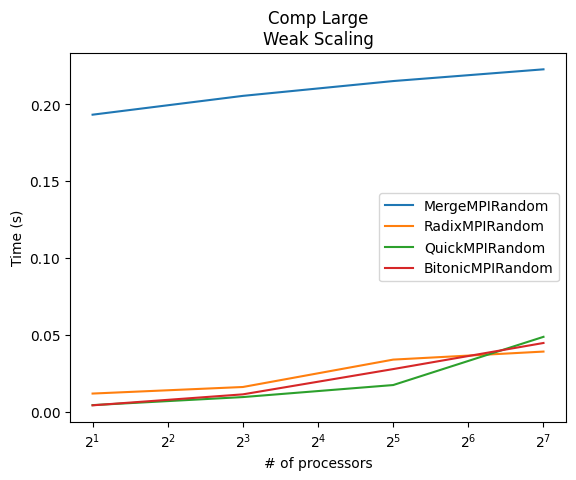

In [45]:
# for key in algosMain.keys():
#     plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

# for key in algosComm.keys():
#     plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
plot_weak_scaling(algosComp, values, 'Avg time/rank', 'Comp Large\nWeak Scaling', '# of processors', 'Time (s)')

CUDA

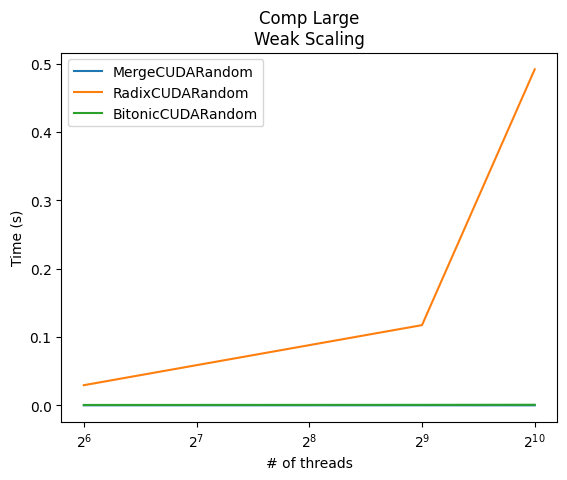

In [46]:
plot_weak_scaling_CUDA(algosCompCUDA, values, 'Avg time/rank', 'Comp Large\nWeak Scaling', '# of threads', 'Time (s)')